## Felicia Kathrin Valerie Harsono - 0706022310002
## Talitha Celin Widjaja - 0706022310019

# **Part A – Data Preprocessing and EDA**

## **Load and inspect the dataset**

In [ ]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

In [ ]:
# load dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Bank%20(1).csv"
df = pd.read_csv(url, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
# Mengetahui kolom apa saja pada data serta jumlah null value pada data dan type data nya.
# Dari sini kita lihat tidak ada missing value sehingga sudah aman
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
# get statistical info from dataset

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Untuk pdays memiliki minimal value -1, yang berarti belum pernah dihubungin oleh nasabah

In [ ]:
# show unique values from column

unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'age': array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
        26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
        51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
        62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84]),
 'job': array(['unemployed', 'services', 'management', 'blue-collar',
        'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
        'housemaid', 'retired', 'unknown'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'balance': array([ 1787,  4789,  1350, ...,  -333, -3313,  1137]),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'unknown', 'telephone'], dtype=object),
 'day': array([19, 11, 16,  3,  5, 23, 14,  6, 17, 20,

## **Visualization 1**

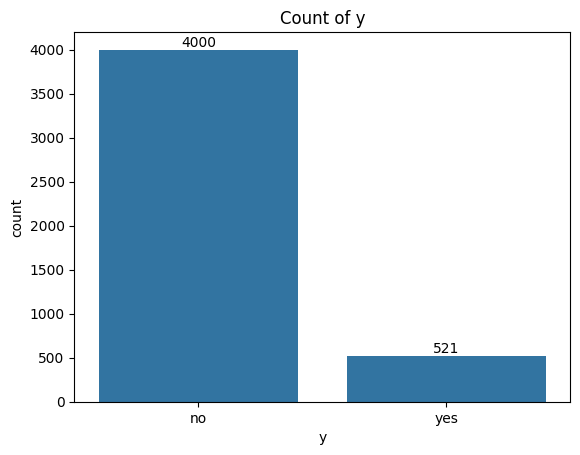

In [ ]:
# show how many attrition
ax = sns.countplot(data=df, x='y')
plt.title('Count of y')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# imbalance dataset but it's okay let us try firsttt

Dari bar chart diatas, kita bisa mengetahui bahwa kolom y atau target memiliki data yang imbalance sehingga perlu untuk dilakukan oversampling.

## **Visualization 2**

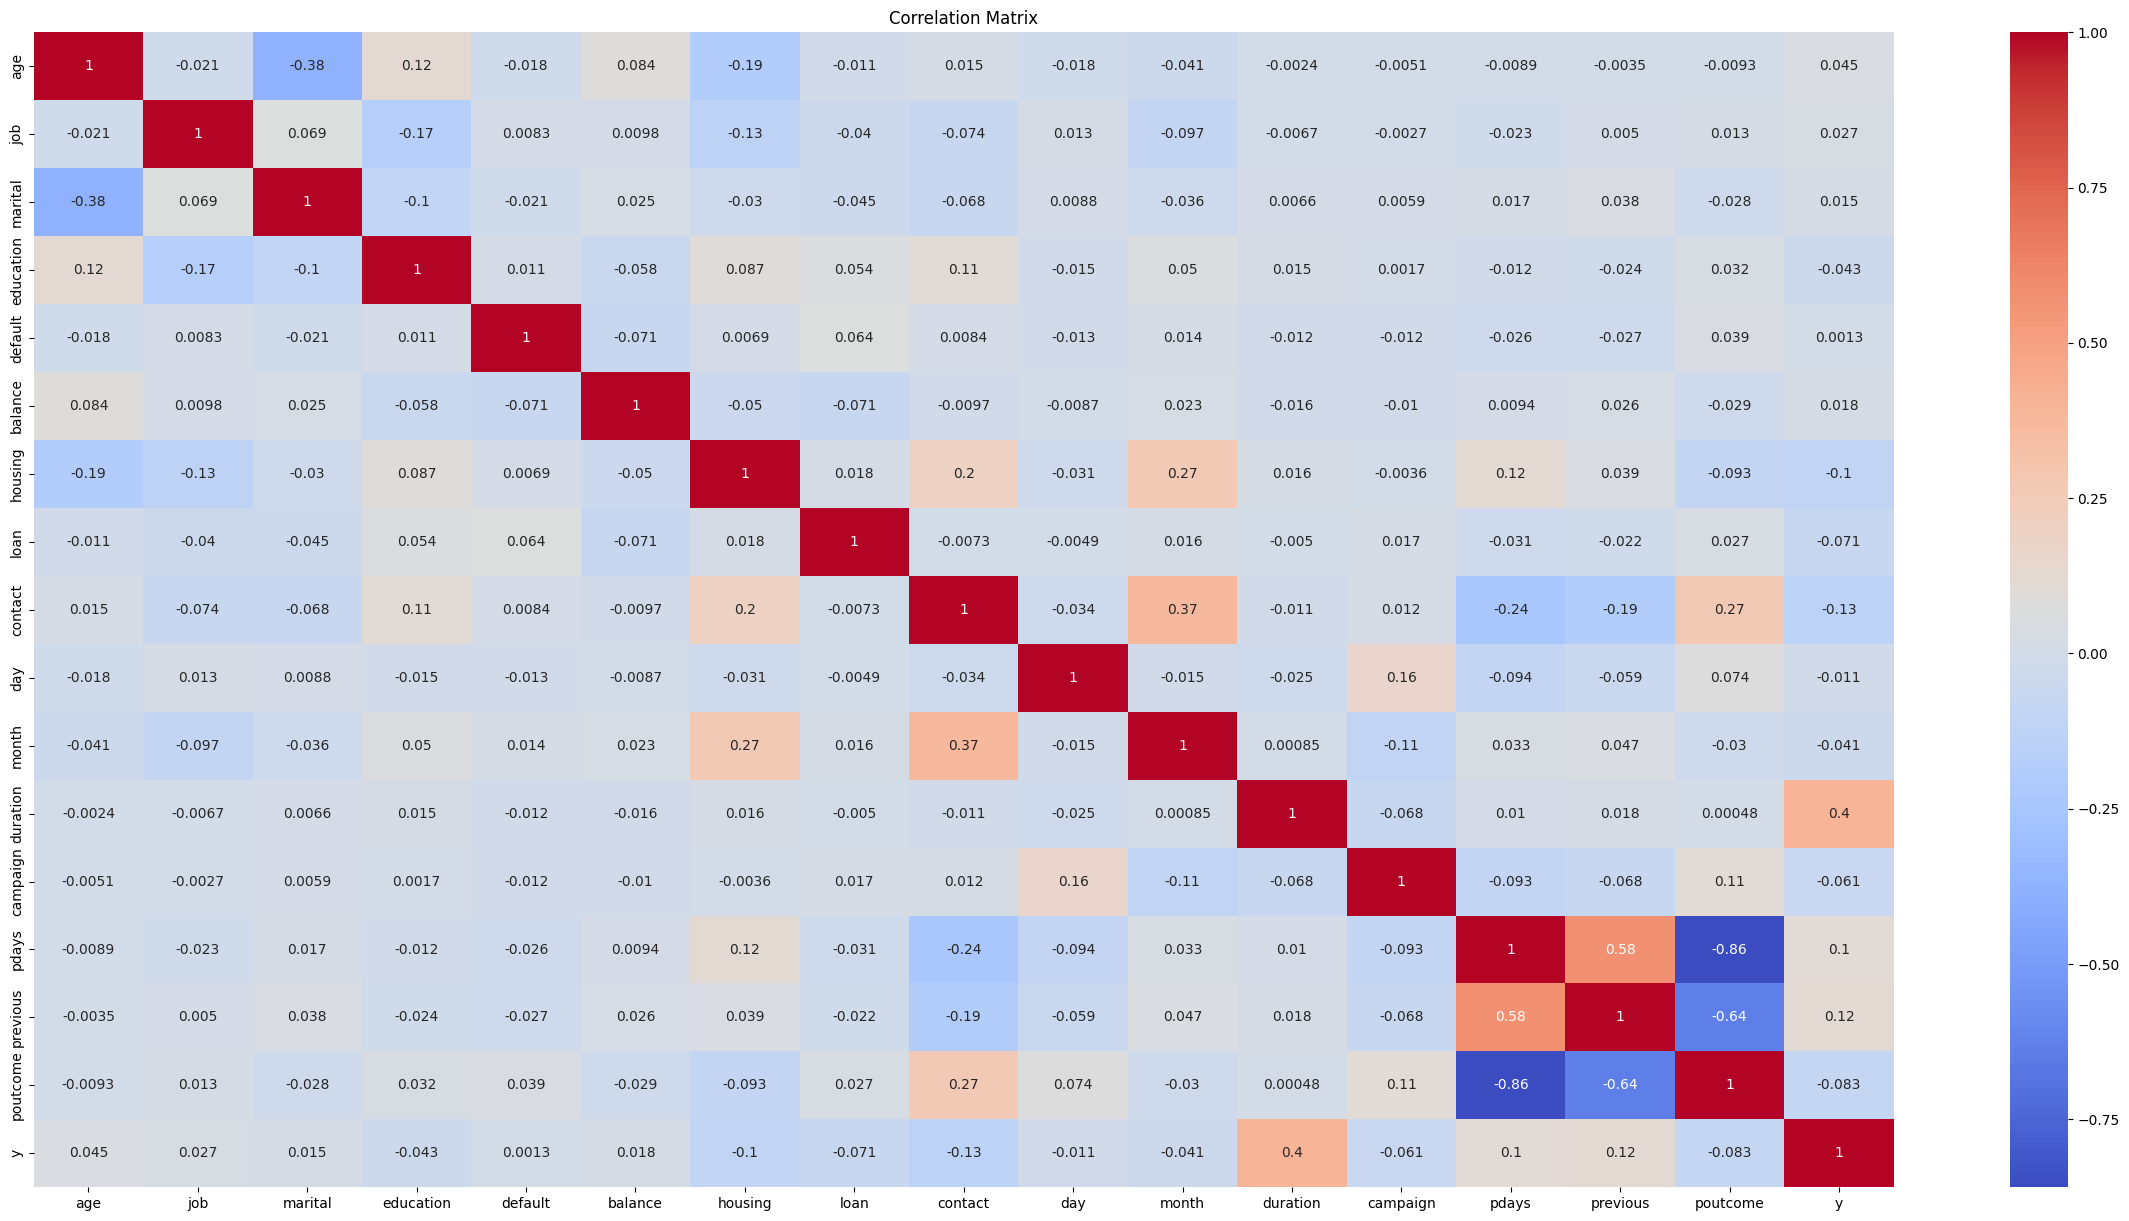

Dari heatmap tersebut, kita bisa melihat bahwa variabel-variable yang memiliki korelasi yang kuat dengan target (y) adalah duration, pdays, previous, balance, housing, loan, campaign. Sehingga hanya kolom tersebut yang akan digunakan untuk modeling. (untuk code nya bisa dilihat dibawah)

## **Visualization 3**

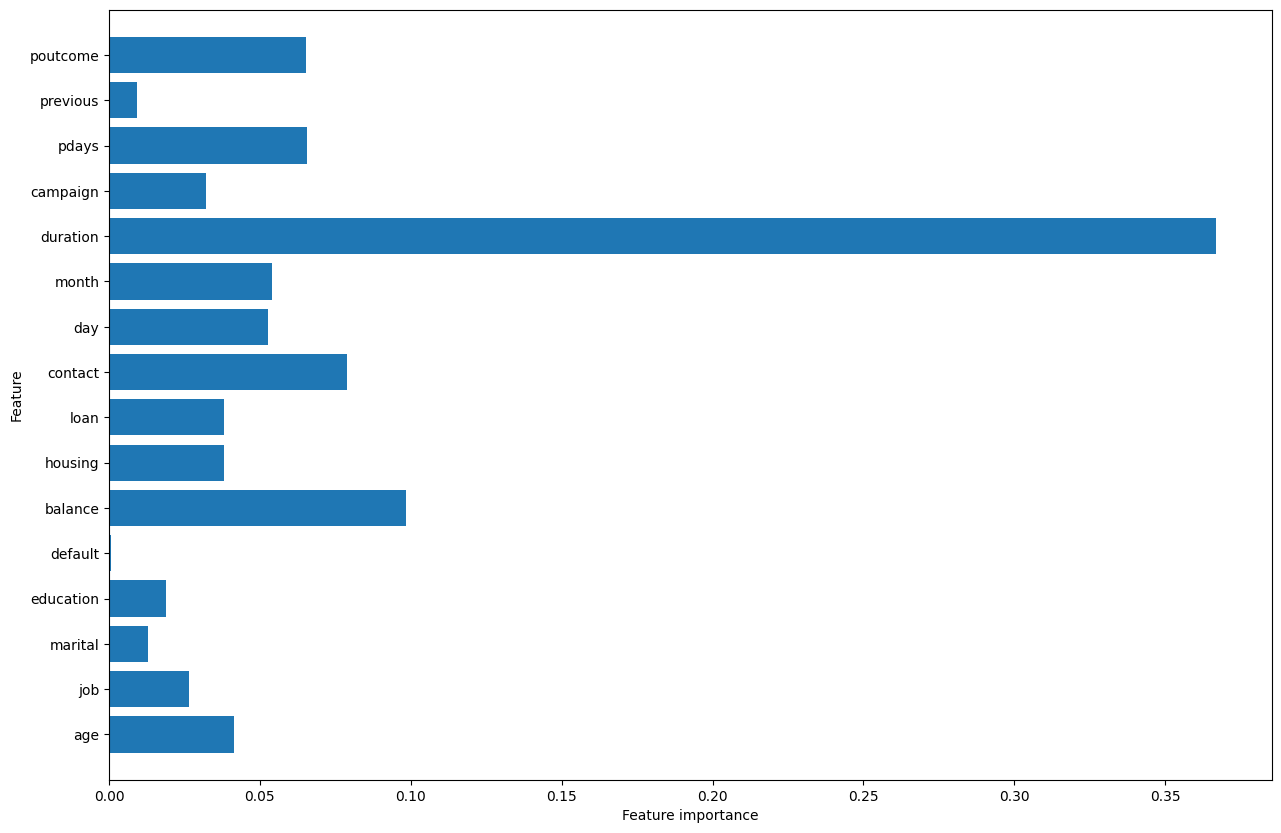

Dari bar chart feature importance kita bisa melihat bahwa kolom-kolom yang penting dan memiliki pengaruh terbesar itu  adalah yang memiliki nilai feature importance lebih dari 0.05 yaitu kolom seperti "duration", "balance", "contact" , "poutcome" , "pdays" , "month", dan "day". Sehingga hanya kolom tersebut yang akan digunakan untuk modeling. (untuk code bisa dilihat dibawah)


## **Encode the features.**

In [ ]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Columns: Attrition, Gender, OverTime

one_hot_map = {
    'default': {'no': 0, 'yes': 1},
    'housing': {'no': 0, 'yes': 1},
    'loan': {'no': 0, 'yes': 1},
    'y':{'no': 0, 'yes': 1}
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)


# 2. Ordinal Encoding
education_mapping = {'primary': 3, 'secondary': 2, 'tertiary': 1, 'unknown': 0}
df_encoded['education'] = df_encoded['education'].map(education_mapping)



# 3. Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['job', 'marital', 'contact', 'month', 'poutcome']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'contact': {'cellular': 0, 'telephone': 1, 'unknown': 2},
 'job': {'admin.': 0,
         'blue-collar': 1,
         'entrepreneur': 2,
         'housemaid': 3,
         'management': 4,
         'retired': 5,
         'self-employed': 6,
         'services': 7,
         'student': 8,
         'technician': 9,
         'unemployed': 10,
         'unknown': 11},
 'marital': {'divorced': 0, 'married': 1, 'single': 2},
 'month': {'apr': 0,
           'aug': 1,
           'dec': 2,
           'feb': 3,
           'jan': 4,
           'jul': 5,
           'jun': 6,
           'mar': 7,
           'may': 8,
           'nov': 9,
           'oct': 10,
           'sep': 11},
 'poutcome': {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}}


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3052,40,3.0,1.0,2,0,4610,0,0,0.0,14,1.0,154,2,-1,0,3.0,0
390,33,4.0,2.0,1,0,1240,1,0,0.0,4,3.0,505,2,260,1,1.0,0
661,28,4.0,2.0,1,0,0,1,0,0.0,16,5.0,767,5,-1,0,3.0,1
3080,33,7.0,1.0,2,0,478,0,0,0.0,30,0.0,475,2,-1,0,3.0,1
4426,41,0.0,1.0,1,0,1536,0,0,0.0,4,8.0,54,2,-1,0,3.0,0


In [ ]:
df.loc[616]

,616
age,28
job,management
marital,single
education,tertiary
default,no
balance,231
housing,yes
loan,yes
contact,cellular
day,25


In [ ]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [ ]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10.0,1.0,3,0,1787,0,0,0.0,19,10.0,79,1,-1,0,3.0
1,33,7.0,1.0,2,0,4789,1,1,0.0,11,8.0,220,1,339,4,0.0
2,35,4.0,2.0,1,0,1350,1,0,0.0,16,0.0,185,1,330,1,0.0
3,30,4.0,1.0,1,0,1476,1,1,2.0,3,6.0,199,4,-1,0,3.0
4,59,1.0,1.0,2,0,0,1,0,2.0,5,8.0,226,1,-1,0,3.0


In [ ]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


## **Split the dataset into Training set and Testing set**

In [ ]:
# we split 80-20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((3616, 16), (905, 16))

In [ ]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4383,26,0.0,2.0,2,0,609,0,0,1.0,28,4.0,112,1,-1,0,3.0
502,31,4.0,1.0,1,0,13,0,0,0.0,28,1.0,110,5,-1,0,3.0
4052,52,10.0,1.0,3,0,20,1,0,1.0,28,4.0,172,1,-1,0,3.0
3634,54,5.0,1.0,2,0,153,1,1,2.0,26,8.0,74,1,-1,0,3.0
3088,31,9.0,2.0,2,0,2544,0,0,0.0,15,5.0,252,1,184,3,2.0


In [ ]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4274,35,1.0,1.0,3,0,378,1,0,2.0,16,8.0,427,3,-1,0,3.0
72,31,4.0,2.0,1,0,6248,1,0,2.0,9,8.0,154,2,-1,0,3.0
1065,30,10.0,1.0,1,0,0,1,0,0.0,18,9.0,756,1,-1,0,3.0
3185,42,0.0,1.0,2,0,529,1,1,0.0,19,9.0,193,3,-1,0,3.0
130,41,1.0,1.0,3,0,168,1,0,0.0,18,9.0,187,3,-1,0,3.0


## **Oversampling Using SMOTENC**

In [ ]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
categorical_features = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'day',
    'poutcome',
]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 16), (2400, 16))

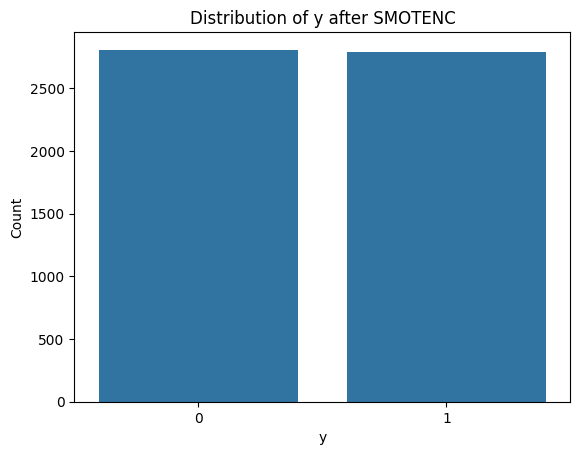

In [ ]:
# just to visualize the distribution of target class after SMOTENC

sns.countplot(x=y_train)
plt.title('Distribution of y after SMOTENC')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


# **Part B – Model Development**

## **Decision Tree with No Parameter**

In [ ]:
# BUILD CLASSIFICATION MODEL but with no parameters :(
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train_dt = tree.predict(X_train)
y_pred_test_dt = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train_dt))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_dt))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1192
           1       0.88      0.88      0.88      1208

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400



The confusion matrix is already good enough even without parameter

KFOLD CROSS VALIDATION DECISION TREE

In [ ]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 6400, Test set:1600
Fold:2, Train set: 6400, Test set:1600
Fold:3, Train set: 6400, Test set:1600
Fold:4, Train set: 6400, Test set:1600
Fold:5, Train set: 6400, Test set:1600


In [ ]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.87138462 0.88944099 0.8962963  0.8722467  0.87274984]
Average score: 0.88


## **Decision Tree with Parameter**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    # 'criterion': ['gini', 'entropy'],
    # 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'random_state': [0, 41, 42]

    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 9, 12, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [0, 41, 42]

}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

y_pred_train_dt_best = grid_search.predict(X_train)
y_pred_test_dt_best = grid_search.predict(X_test)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

print("\n=== Classification Report (Train Set) ===")
print(classification_report(y_train, y_pred_train_dt_best))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_dt_best))

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}
Best cross-validation f1 score: 0.886

=== Classification Report (Train Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1192
           1       0.88      0.88      0.88      1208

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400



No big changes after tuning and use parameter.

## **Random Forest Classifier with No Parameter**

In [ ]:
from sklearn. ensemble import RandomForestClassifier
random = RandomForestClassifier()
random. fit(X_train, y_train)

y_pred_train_random = random.predict(X_train)
y_pred_test_random = random.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train_random))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_random))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1192
           1       0.92      0.94      0.93      1208

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



Its getting higher using random forest than decision tree

## **Random Forest Classifier with Parameter**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
'n_estimators': [100, 200],
'max_depth': [None, 10, 20],
'min_samples_split': [2, 5],
'min_samples_leaf': [1, 2],
'bootstrap': [True, False]}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred_train_random_best = grid_search.predict(X_train)
y_pred_test_random_best = grid_search.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

print("\n=== Classification Report (Train Set) ===")
print(classification_report(y_train, y_pred_train_random_best))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_random_best))

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Estimator: RandomForestClassifier(bootstrap=False, n_estimators=200)
Best cross-validation f1 score: 0.926

=== Classification Report (Train Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1192
           1       0.92      0.94      0.93      1208

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



the f1 score and accuracy increase 0.01 using parameter

## **Gradient Boosting with No Parameter**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier()
gbc_clf. fit(X_train, y_train)

y_pred_train_gbc = gbc_clf.predict(X_train)
y_pred_test_gbc = gbc_clf.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train_gbc))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_gbc))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2808
           1       0.89      0.92      0.90      2792

    accuracy                           0.90      5600
   macro avg       0.90      0.90      0.90      5600
weighted avg       0.90      0.90      0.90      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1192
           1       0.87      0.88      0.88      1208

    accuracy                           0.87      2400
   macro avg       0.87      0.87      0.87      2400
weighted avg       0.87      0.87      0.87      2400



compare to the others method (decision tree and random forest), xg boost have the lowest confusion matrix. so lets try using parameter and tuning

## **Gradient Boosting with Parameter**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
'n_estimators': [50, 100, 200],
'learning_rate': [0.01, 0.1, 0.2],
'max_depth': [3, 5, 7],
}

gb_model = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs =- 1)

grid_search.fit(X_train, y_train)

y_pred_train_gbc_best = grid_search.predict(X_train)
y_pred_test_gbc_best = grid_search.predict(X_test)

best_params = grid_search. best_params_
best_model = grid_search. best_estimator_

#y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_test_gbc_best)

print("Best Parameters:", best_params)
print(f"Best Model Accuracy: {accuracy_best}")
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

print("\n=== Classification Report (Train Set) ===")
print(classification_report(y_train, y_pred_train_gbc_best))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_gbc_best))

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best Model Accuracy: 0.9345833333333333
Best cross-validation f1 score: 0.934

=== Classification Report (Train Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1192
           1       0.92      0.95      0.94      1208

    accuracy                           0.93      2400
   macro avg       0.94      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



There is a significant change in f1-score, it is better after tuning and with parameter

## **Feature Importance**

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.04126986 0.02658599 0.01283733 0.01902854 0.00080306 0.09830271
 0.03818807 0.03815158 0.07895222 0.05273157 0.05405415 0.36689316
 0.03199223 0.06551171 0.00930373 0.06539408]


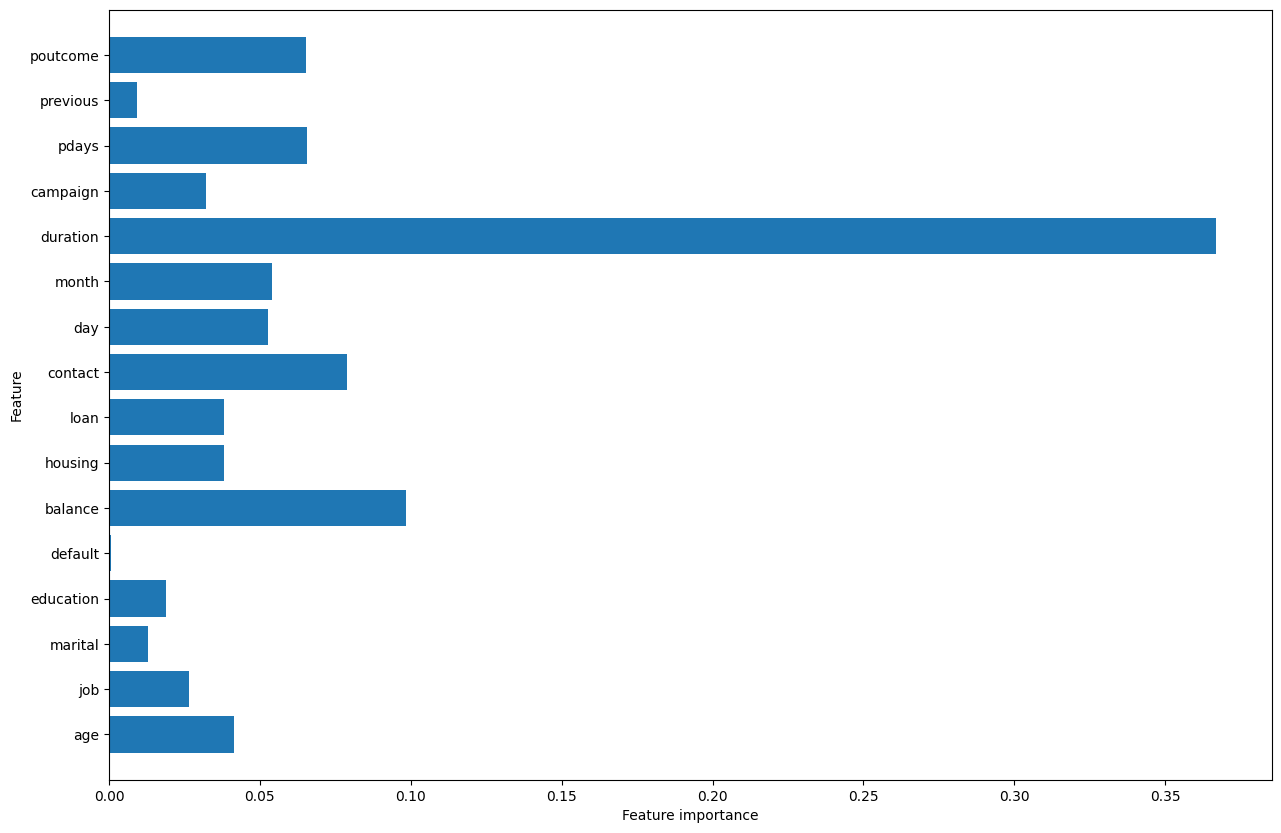

In [ ]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [ ]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
duration,0.366893
balance,0.098303
contact,0.078952
pdays,0.065512
poutcome,0.065394
month,0.054054
day,0.052732


In [ ]:
# using only important features for the prediction
important_features = [
    "duration",
    "balance",
    "contact",
    "poutcome",
    "pdays",
    "month",
    "day"
]

X_importance = df_encoded[important_features] #input
y_importance = df_encoded['y'] #target

In [ ]:
display(X_importance)
display(y_importance)

,duration,balance,contact,poutcome,pdays,month,day
0,79,1787,0.0,3.0,-1,10.0,19
1,220,4789,0.0,0.0,339,8.0,11
2,185,1350,0.0,0.0,330,0.0,16
3,199,1476,2.0,3.0,-1,6.0,3
4,226,0,2.0,3.0,-1,8.0,5
...,...,...,...,...,...,...,...
4516,329,-333,0.0,3.0,-1,5.0,30
4517,153,-3313,2.0,3.0,-1,8.0,9
4518,151,295,0.0,3.0,-1,1.0,19
4519,129,1137,0.0,1.0,211,3.0,6


,y
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


In [ ]:
# oversampling againnn
categorical_features = ["contact", "poutcome", "month", "day"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_importance, y_importance = smotenc.fit_resample(X_importance, y_importance)

X_train, X_test, y_train, y_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 7), (2400, 7))

DECISION TREE

In [ ]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1206
           1       0.86      0.90      0.88      1194

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400



Precision naik, tapi overal sama aja

RANDOM FOREST

In [ ]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

importance_tree = RandomForestClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      1206
           1       0.90      0.95      0.92      1194

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400



bagus naik

XG BOOST

In [ ]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

importance_tree = GradientBoostingClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      2794
           1       0.85      0.90      0.88      2806

    accuracy                           0.87      5600
   macro avg       0.87      0.87      0.87      5600
weighted avg       0.87      0.87      0.87      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1206
           1       0.83      0.89      0.86      1194

    accuracy                           0.86      2400
   macro avg       0.86      0.86      0.86      2400
weighted avg       0.86      0.86      0.86      2400



ok its the lowest one

## **Using Heatmap**

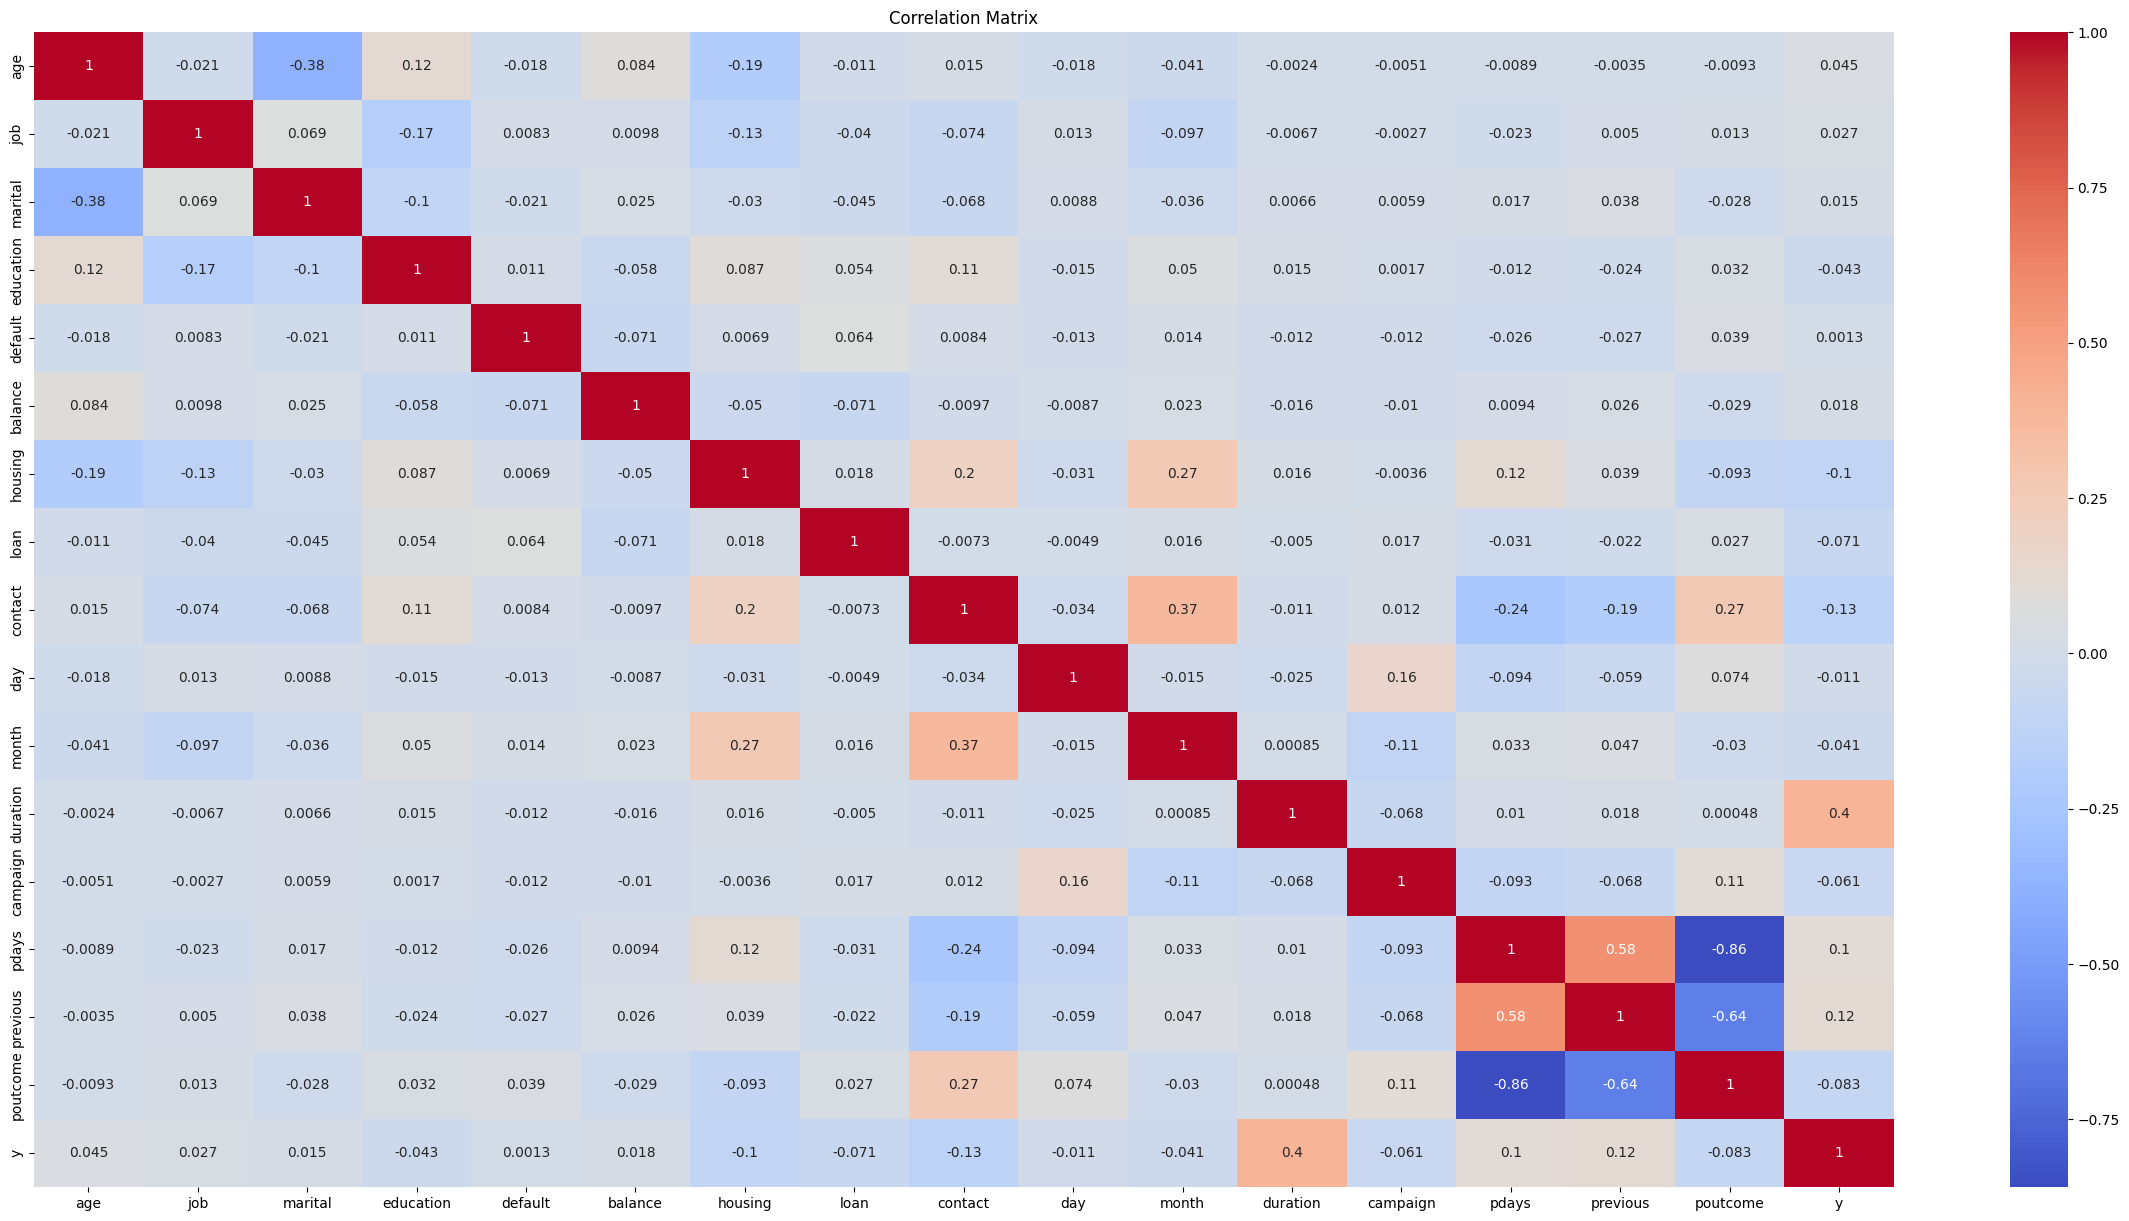

In [ ]:
# show heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
heatmap_features = [
    'duration',
    'pdays',
    'previous',
    'balance',
    'housing',
    'loan',
    'campaign'
]
X_heatmap = df_encoded[heatmap_features] #input
y_heatmap = df_encoded['y'] #target

In [ ]:
# dont forget to define the categorical features ok
categorical_features = ["housing", "loan"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_heatmap, y_heatmap = smotenc.fit_resample(X_heatmap, y_heatmap)

X_train, X_test, y_train, y_test = train_test_split(X_heatmap, y_heatmap, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 7), (2400, 7))

In [ ]:
# i build a model based on best feature by correlation
heatmap_tree = DecisionTreeClassifier()
heatmap_tree.fit(X_train, y_train)

y_pred_train = heatmap_tree.predict(X_train)
y_pred_test = heatmap_tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1192
           1       0.85      0.89      0.87      1208

    accuracy                           0.87      2400
   macro avg       0.87      0.87      0.87      2400
weighted avg       0.87      0.87      0.87      2400



confusion matrix menurun dibandingkan pakai important features dan kfold

RANDOM FOREST

In [ ]:
# i build a model based on best feature by correlation
heatmap_tree = RandomForestClassifier()
heatmap_tree.fit(X_train, y_train)

y_pred_train = heatmap_tree.predict(X_train)
y_pred_test = heatmap_tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1192
           1       0.87      0.92      0.89      1208

    accuracy                           0.89      2400
   macro avg       0.89      0.89      0.89      2400
weighted avg       0.89      0.89      0.89      2400



lebih bagus dibandingkan random forest with no parameters

In [ ]:
# i build a model based on best feature by correlation
heatmap_tree = GradientBoostingClassifier()
heatmap_tree.fit(X_train, y_train)

y_pred_train = heatmap_tree.predict(X_train)
y_pred_test = heatmap_tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      2808
           1       0.86      0.88      0.87      2792

    accuracy                           0.87      5600
   macro avg       0.87      0.87      0.87      5600
weighted avg       0.87      0.87      0.87      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1192
           1       0.84      0.85      0.84      1208

    accuracy                           0.84      2400
   macro avg       0.84      0.84      0.84      2400
weighted avg       0.84      0.84      0.84      2400



jelek banget

# **Part C – Model Evaluation**

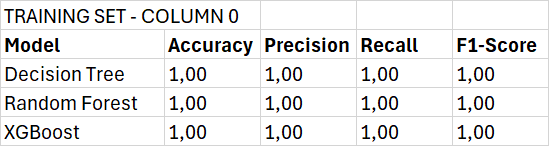

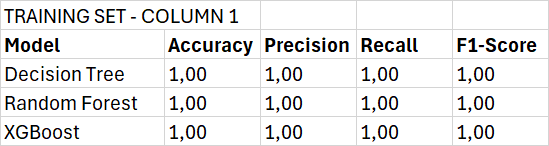

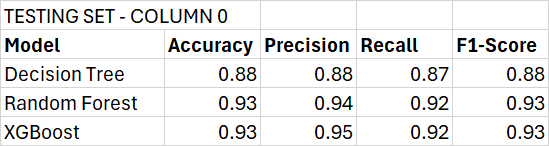

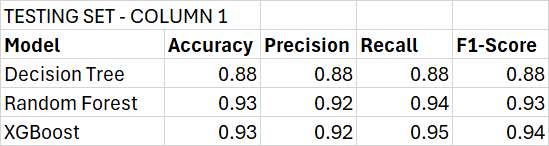

# **Part D – Discussion and Insights**

Which model performed best overall?

Random forest and XGBoost give the best model, as we can see on the confusion matrix above, random forest and xgboost generate the highest accuracy, precision, recall and f1 score after doing tuning


Did ensemble methods (RF, XGBoost) improve performance compared to a single
Decision Tree?

Yes RF and XGboost improve performance compared to a single decision tree. Because its combine many trees to reduce mistakes and make smarter, more balanced predictions.

How could the bank use these insights to refine its marketing strategy?

If the bank wants to avoid missing potential interested customers (don't want to lose sales opportunities) and focus on maximize new product uptake, bank should use the model with best Recall which is XGBoost (0.95)

If the bank wants to avoid bothering uninterested customers (reduce marketing costs and annoyance),bank should use the model with the best Precision which is Random Forest (0.94)

But if the bank wants a balance between both , bank should consider the F1 score and the model with the best F1-Score is XGBoost with 0.94 score